## Image Caption Generator

We are going to use Transformers model to generate caption from an Image.

### Installation



1.   Transformers
2.   Pytorch
3. Image

For installation, please do pip install package_name

In Colab, Pytorch comes preinstalled and same goes with PIL for Image. You will only need to install **transformers** from Huggingface.




In [1]:
!pip install transformers

In [34]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [36]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds



/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [38]:
predict_step(['sample2.jpg'])

['a man riding a horse on top of a beach']

In [7]:
# prompt: write code to Connect to drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# prompt: code to read images from mydrive

import os

# Get the path to the My Drive folder
my_drive_path = "/content/drive/MyDrive/pictures"

# Get a list of all the files in the My Drive folder
files = os.listdir(my_drive_path)

# Get a list of all the images in the My Drive folder
images = [file for file in files if file.endswith(".jpg") or file.endswith(".png")]

# Print the list of images
print(images)


['adrian-deweerdt-kJ2xdKJZZ9k-unsplash.jpg', 'chris-spiegl-CSJPm2POibQ-unsplash.jpg', 'fajar-grinanda-EkBBPRMPH_M-unsplash.jpg', 'eagle-media-pro-246P33S3aFk-unsplash.jpg', 'craig-bradford-CCELQ6NlkcI-unsplash.jpg']


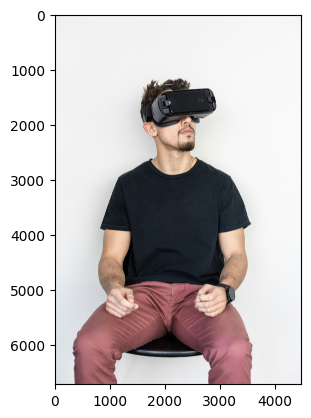

a man sitting on a chair with his eyes closed


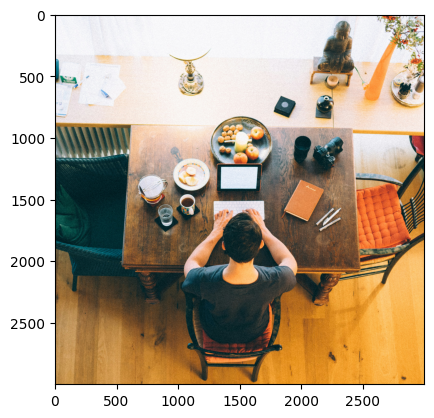

a person sitting at a table with a laptop


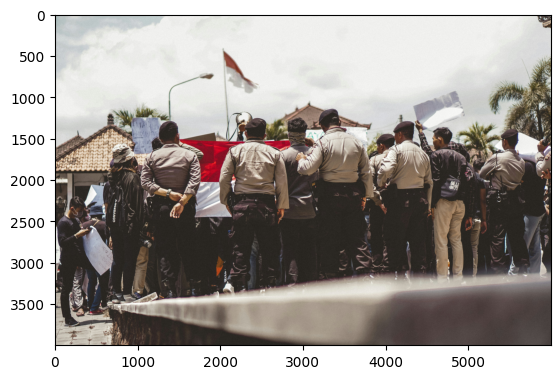

a large group of people standing in front of a building


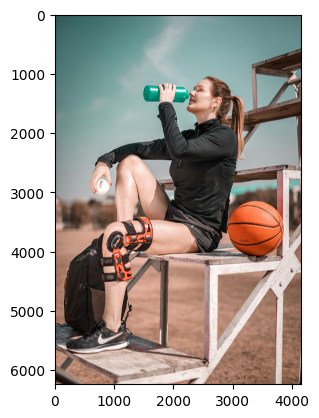

a woman sitting on a bench drinking a beer


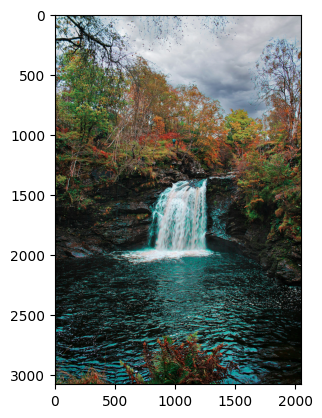

a river flowing through a forest filled with trees


In [40]:
# prompt: Code to display each image in images list and the caption for it alongside using predict_step(['img.jpeg']) method

import matplotlib.pyplot as plt
my_drive_path = "/content/drive/MyDrive/pictures"
img_caption = {}
for image in images:
  # Get the image path
  image_path = os.path.join(my_drive_path, image)

  # Display the image
  plt.imshow(plt.imread(image_path))
  plt.show()

  # Get the caption for the image
  caption = predict_step([image_path])[0]
  img_caption[image_path] = caption
  # Print the caption
  print(caption)


In [41]:
print(img_caption)

{'/content/drive/MyDrive/pictures/adrian-deweerdt-kJ2xdKJZZ9k-unsplash.jpg': 'a man sitting on a chair with his eyes closed', '/content/drive/MyDrive/pictures/chris-spiegl-CSJPm2POibQ-unsplash.jpg': 'a person sitting at a table with a laptop', '/content/drive/MyDrive/pictures/fajar-grinanda-EkBBPRMPH_M-unsplash.jpg': 'a large group of people standing in front of a building', '/content/drive/MyDrive/pictures/eagle-media-pro-246P33S3aFk-unsplash.jpg': 'a woman sitting on a bench drinking a beer', '/content/drive/MyDrive/pictures/craig-bradford-CCELQ6NlkcI-unsplash.jpg': 'a river flowing through a forest filled with trees'}


In [32]:
# prompt: img_caption is a key value pair with key as the image and value as the caption of the image, write a code to create an intelligent image search using vector database to search and display the images using FAISS vector database. Use GoogleGenerativeAIEmbeddings from langchain to create Embedding vectors
# ImportError: cannot import name 'GoogleGenerativeAIEmbeddings' from 'langchain.embeddings' (/us

from langchain.embeddings.google_generative_ai import GoogleGenerativeAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import CharacterTextSplitter
from langchain.docstore.document import Document

# Create a list of images and captions
images = []
captions = []
for image_path, caption in img_caption.items():
  images.append(image_path)
  captions.append(caption)

# Create a text splitter
text_splitter = CharacterTextSplitter()

# Create a list of documents
documents = []
for image, caption in zip(images, captions):
  document = Document(page_content=caption, metadata={"image_path": image})
  documents.append(document)

# Create an embedding function
embedding_function = GoogleGenerativeAIEmbeddings()

# Create a vector store
vector_store = FAISS.from_documents(documents, embedding=embedding_function)

# Search for images using a query
query = "A picture of a cat"
similar_images = vector_store.similarity_search(query, k=5)

# Display the similar images
for image_path in similar_images:
  image = Image.open(image_path)
  plt.imshow(image)
  plt.show()



ModuleNotFoundError: No module named 'langchain.embeddings.google_generative_ai'

In [33]:
pip show langchain

Name: langchain
Version: 0.2.2
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community
